<a href="https://colab.research.google.com/github/Estherbae1/Esther_INSE_6220_Project/blob/main/Principal_Component_Analysis_and_Prediction_of_cart_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Pycaret**

Principal Component Analysis and Car Price Prediction Using Machine Learning

In [362]:
!pip install pycaret==3.0.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Libraries**

In [363]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [364]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

The “Breast Cancer diagnosis Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about tumor attributes to diagnosed it as benign or malignant for breast cancer.

There are 5 attributes with 569 entries and one column for classification. 
**0 represents Benign and 1 represents Malignant.**


All attributes are numerical and they are listed bellow:

1. mean_radius = MR
2. mean_texture = MT
3. mean_perimeter = MP
4. mean_area = MA
5. mean_smoothness = MS
6. diagnosis (Label)

The original dataset can be found on below link:
https://www.kaggle.com/datasets/theodoravalerie/breast-cancer-data





In [365]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Esthersemenhyia/INSE-6220/main/CarPrice_Assignment.csv')
df.head(25)

,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,class
0,2548,130,111,5000,21,27,3
1,2548,130,111,5000,21,27,3
2,2823,152,154,5000,19,26,1
3,2337,109,102,5500,24,30,2
4,2824,136,115,5500,18,22,2
5,2507,136,110,5500,19,25,2
6,2844,136,110,5500,19,25,1
7,2954,136,110,5500,19,25,1
8,3086,131,140,5500,17,20,1
9,3053,131,160,5500,16,22,0


In [366]:
len(df.index)

205

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   curbweight  205 non-null    int64
 1   enginesize  205 non-null    int64
 2   horsepower  205 non-null    int64
 3   peakrpm     205 non-null    int64
 4   citympg     205 non-null    int64
 5   highwaympg  205 non-null    int64
 6   class       205 non-null    int64
dtypes: int64(7)
memory usage: 11.3 KB


In [370]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  15


In [257]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

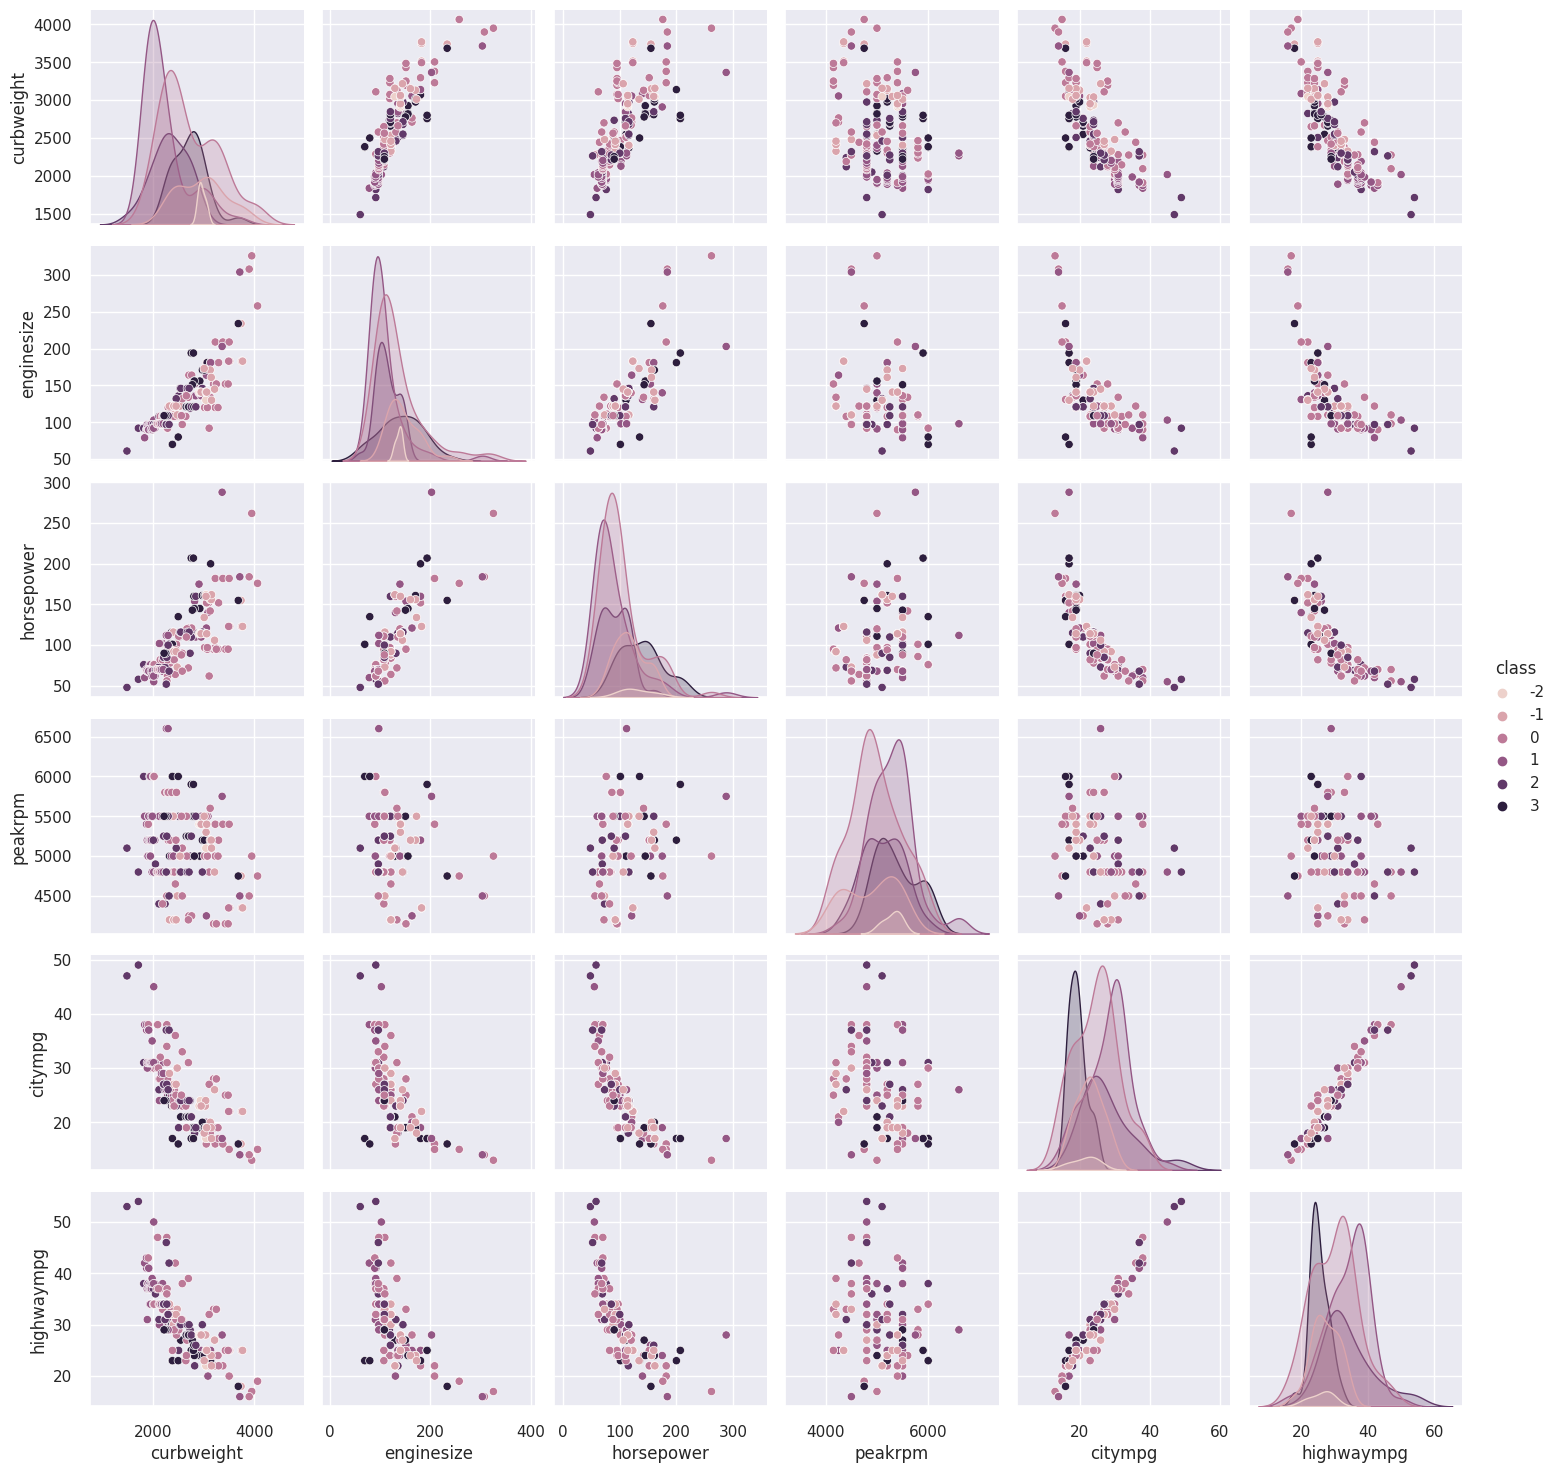

In [371]:
sns.pairplot(df, hue='class')
plt.show()

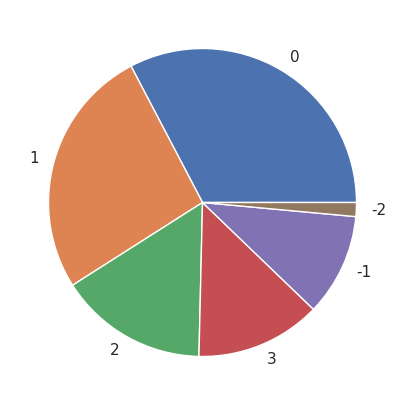

In [372]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [373]:
X = df.drop(columns=['class'])
X.head(10)

,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg
0,2548,130,111,5000,21,27
1,2548,130,111,5000,21,27
2,2823,152,154,5000,19,26
3,2337,109,102,5500,24,30
4,2824,136,115,5500,18,22
5,2507,136,110,5500,19,25
6,2844,136,110,5500,19,25
7,2954,136,110,5500,19,25
8,3086,131,140,5500,17,20
9,3053,131,160,5500,16,22


In [374]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
curbweight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
enginesize,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
horsepower,205.0,104.117073,39.544167,48.0,70.0,95.0,116.0,288.0
peakrpm,205.0,5125.121951,476.985643,4150.0,4800.0,5200.0,5500.0,6600.0
citympg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highwaympg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


**Standardize the Data**

In [375]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg
0,-0.014566,0.074449,0.174483,-0.262960,-0.646553,-0.546059
1,-0.014566,0.074449,0.174483,-0.262960,-0.646553,-0.546059
2,0.514882,0.604046,1.264536,-0.262960,-0.953012,-0.691627
3,-0.420797,-0.431076,-0.053668,0.787855,-0.186865,-0.109354
4,0.516807,0.218885,0.275883,0.787855,-1.106241,-1.273900
5,-0.093502,0.218885,0.149133,0.787855,-0.953012,-0.837195
6,0.555313,0.218885,0.149133,0.787855,-0.953012,-0.837195
7,0.767092,0.218885,0.149133,0.787855,-0.953012,-0.837195
8,1.021227,0.098522,0.909635,0.787855,-1.259470,-1.565037
9,0.957693,0.098522,1.416637,0.787855,-1.412700,-1.273900


In [378]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
curbweight,205.0,1.126470e-16,1.002448,-2.055348,-0.790449,-0.272552,0.730512,2.907988
enginesize,205.0,3.466062e-17,1.002448,-1.586561,-0.719947,-0.166277,0.339248,4.792679
horsepower,205.0,1.819683e-16,1.002448,-1.422573,-0.864871,-0.231119,0.301233,4.661448
peakrpm,205.0,2.772850e-16,1.002448,-2.049347,-0.683286,0.157366,0.787855,3.099650
citympg,205.0,1.104807e-16,1.002448,-1.872388,-0.953012,-0.186865,0.732511,3.643868
highwaympg,205.0,1.473076e-16,1.002448,-2.147310,-0.837195,-0.109354,0.472920,3.384286


**Observations and variables**

In [379]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

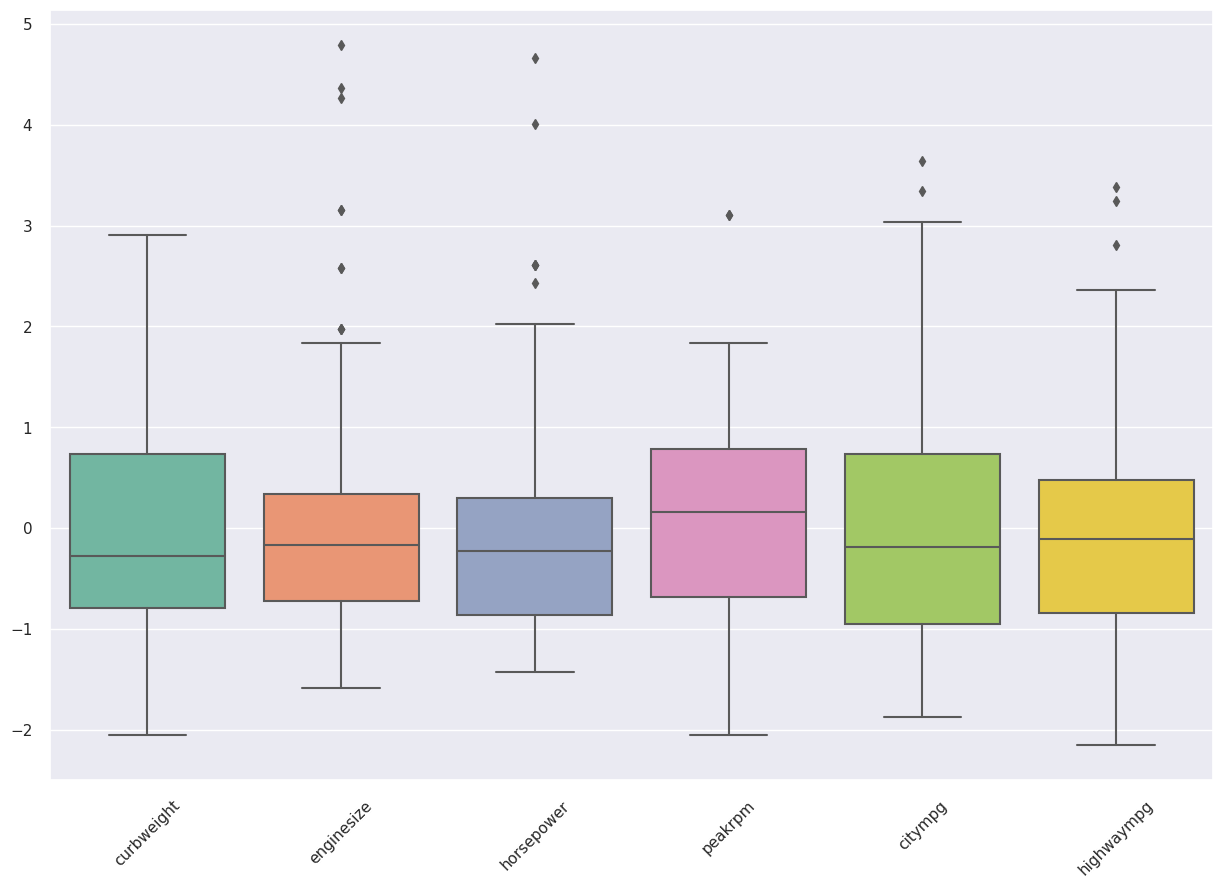

In [380]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

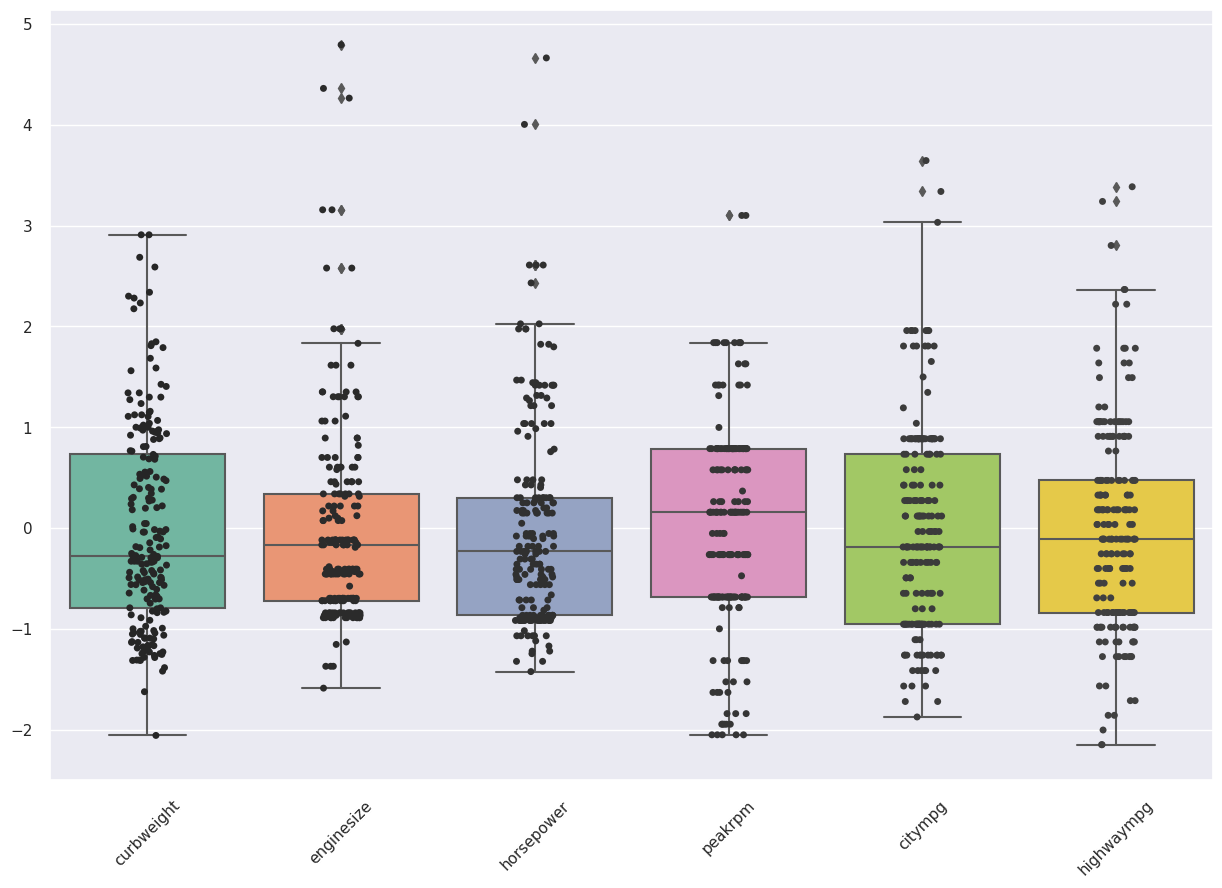

In [381]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

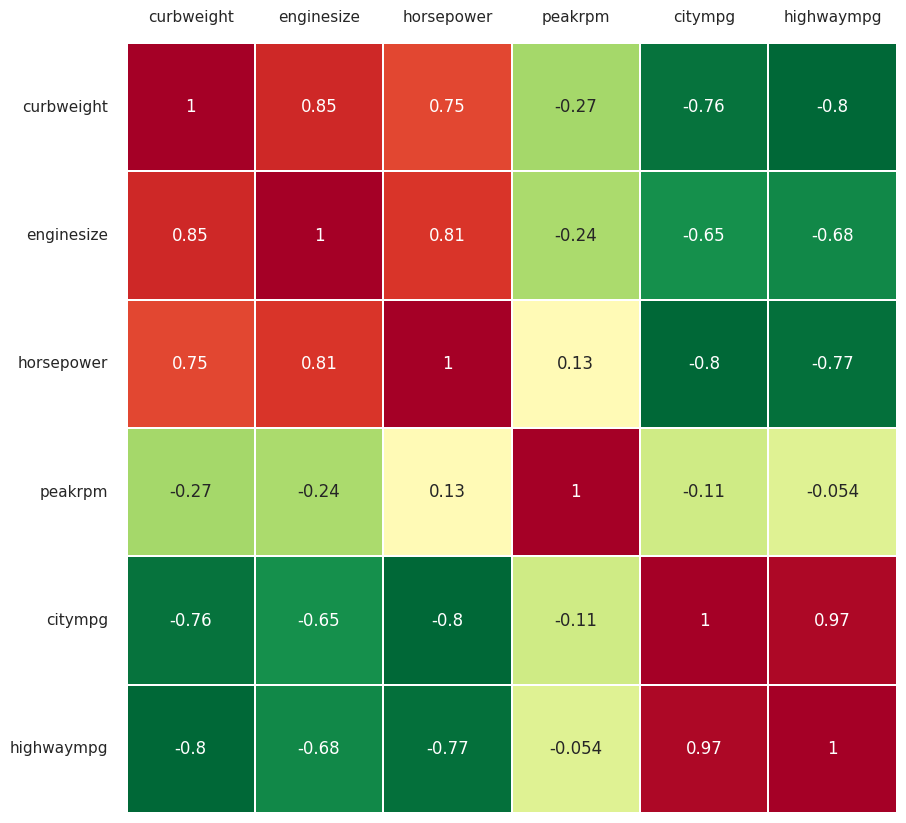

In [382]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

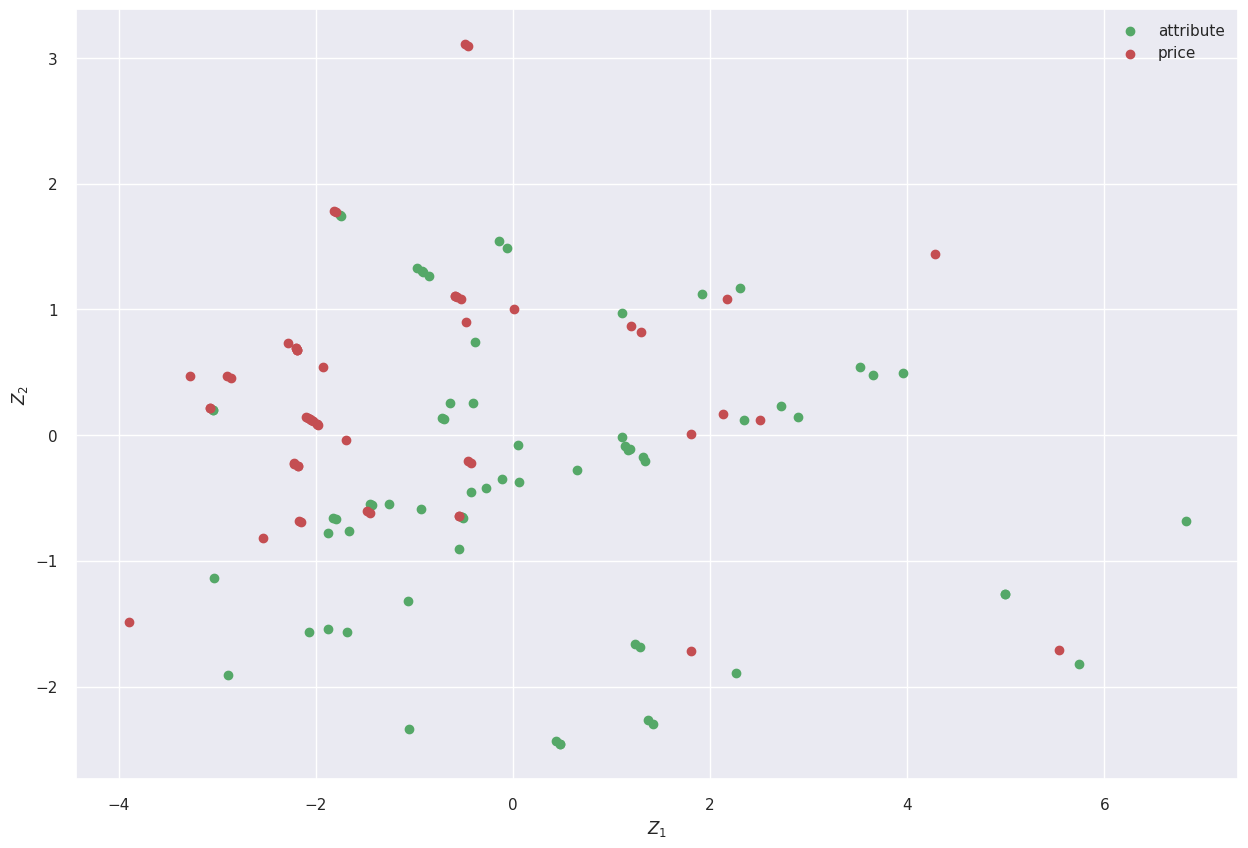

In [383]:
pca = PCA()
Z = pca.fit_transform(X)

# (price)->1,  (attribute)->0

idx_attribute= np.where(y == 0)
idx_price = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_attribute,0], Z[idx_attribute,1], c='g', label='attribute')
plt.scatter(Z[idx_price,0], Z[idx_price,1], c='r', label='price')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[ 4.50463518e-01, -2.30944486e-01, -8.22626928e-04,
         7.26698438e-01,  4.56386079e-01, -8.58353926e-02],
       [ 4.31429495e-01, -2.41396749e-01,  5.36940819e-01,
         7.30063543e-02, -6.76192092e-01, -6.87392445e-02],
       [ 4.44936143e-01,  1.60211515e-01,  4.54891978e-01,
        -5.30107375e-01,  5.15280487e-01,  1.51359101e-01],
       [-2.90102848e-02,  8.92400954e-01,  2.50695345e-01,
         3.60756149e-01, -9.72096133e-02, -1.83323876e-02],
       [-4.51966097e-01, -2.10675934e-01,  4.48117389e-01,
         2.35009680e-01,  9.71929043e-02,  6.97034499e-01],
       [-4.55925530e-01, -1.48191472e-01,  4.91029345e-01,
         1.38229840e-02,  2.23753996e-01, -6.91956975e-01]])

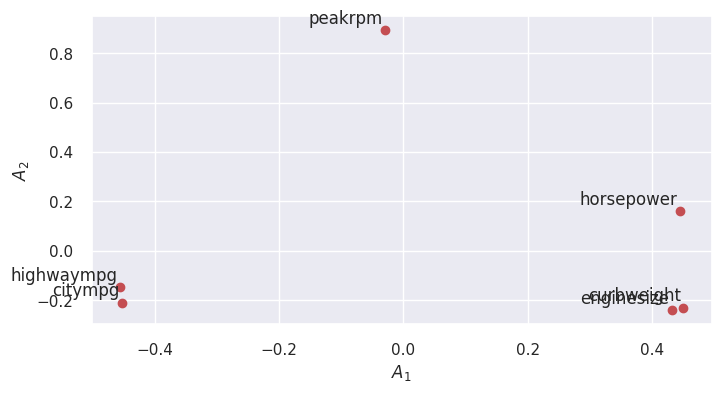

In [384]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

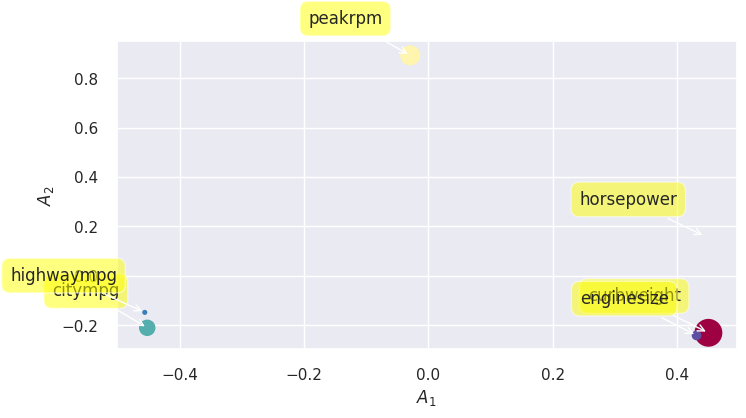

In [385]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([4.16069712, 1.20028665, 0.40741419, 0.14623867, 0.09224198,
       0.02253316])

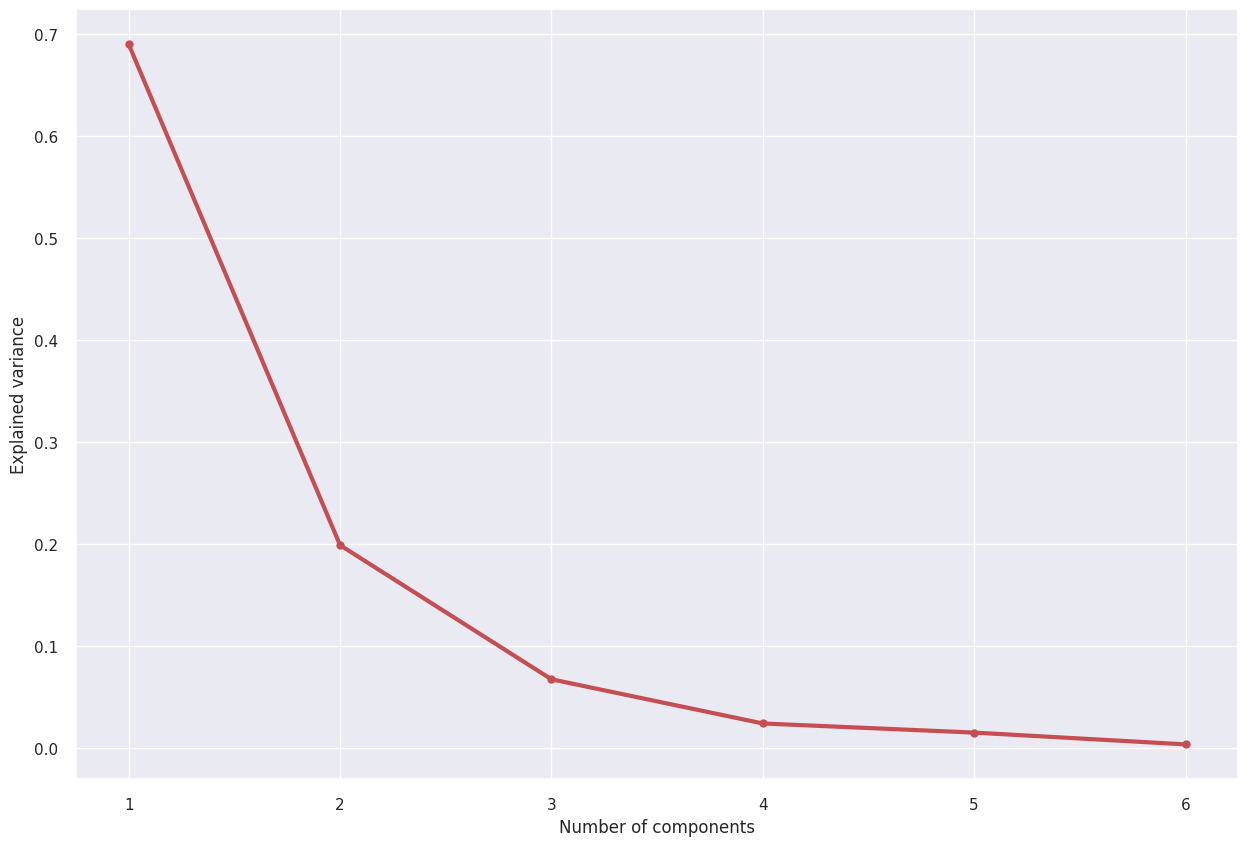

In [386]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

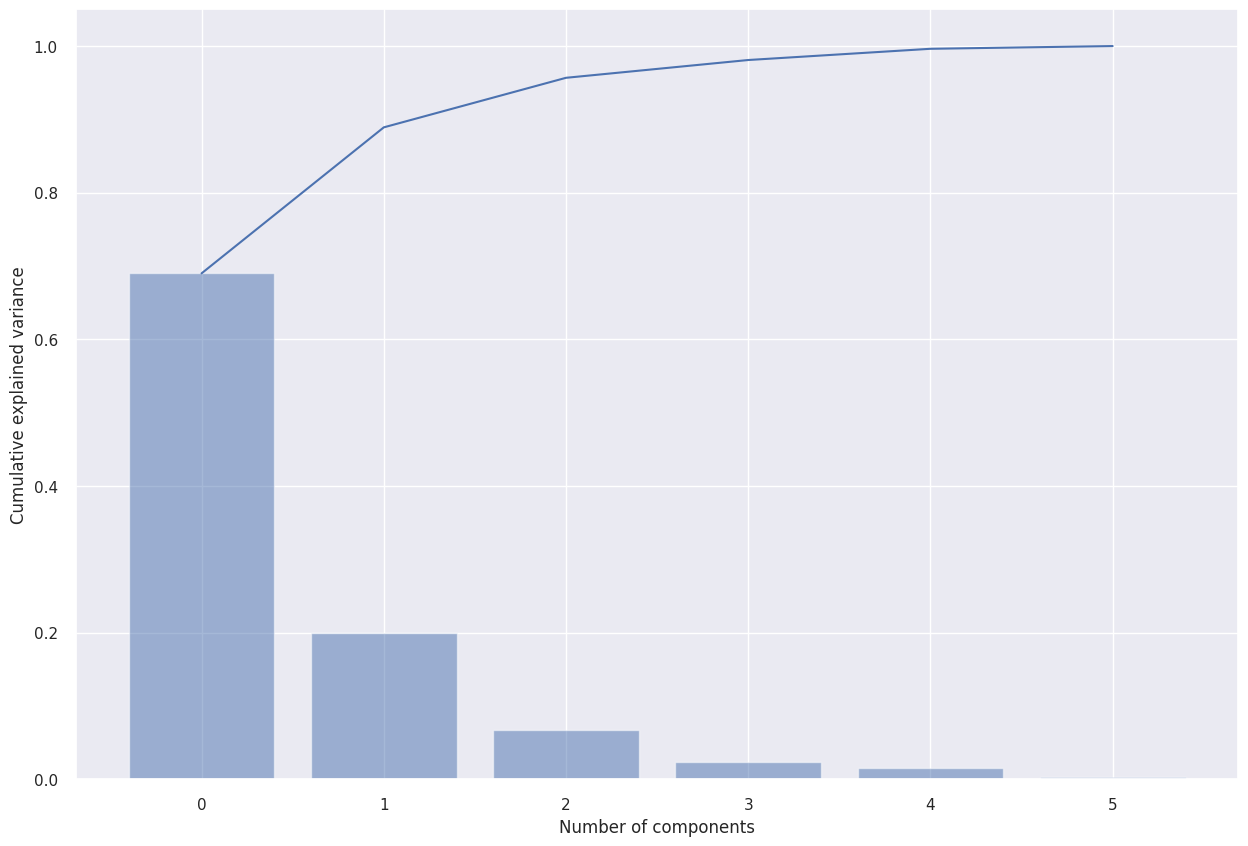

In [387]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-0.00418511, -0.00418511,  0.00647329,  0.95129912,  0.99693036,
        1.02057339,  0.87073321,  0.82182395,  1.08645273,  1.17149078,
        1.54376334,  1.54376334, -1.66137234, -1.68582696, -1.71777186,
        0.54133009,  0.47463565,  0.49448265, -0.60042893,  0.2176787 ,
        0.20211666,  0.47164217,  0.73004852,  1.10814824,  0.68958722,
        0.67980537,  0.67980537,  1.08013657, -0.20688933, -0.00484376,
       -1.48878412,  1.71401023,  0.46655953,  1.77877971,  1.77166564,
        1.74765564,  1.74143083,  1.32650186,  1.30293649,  1.29626704,
        1.26603223,  1.49030743,  0.90307531, -0.44907248,  0.2176787 ,
        0.20211666, -0.24824274, -1.26156576, -1.26156576, -0.6792798 ,
       -0.03645064, -0.22418256, -0.2264057 , -0.24419089, -0.24641404,
        2.46947447,  2.46947447,  2.46725132,  2.52837694, -0.63924739,
       -0.65036313, -0.63924739, -0.65036313, -1.56612526, -0.65703257,
       -0.01542456, -2.33548604, -1.90160232, -2.00609028, -1.89

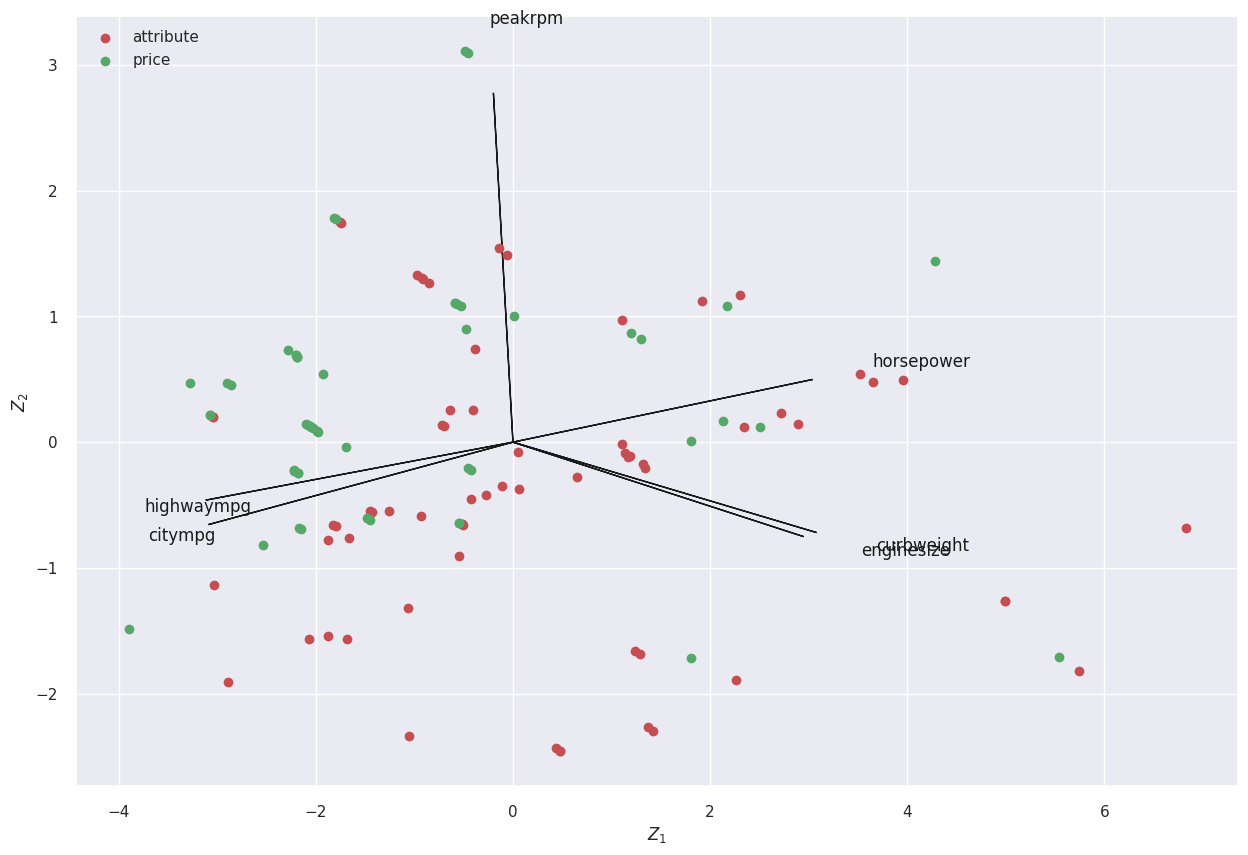

In [389]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_attribute,0], Z[idx_attribute,1], c='r', label='attribute')
plt.scatter(Z[idx_price,0], Z[idx_price,1], c='g', label='price')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [390]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [391]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [392]:
out['PC']

,PC1,PC2,PC3
0,0.652002,-0.004185,-0.504428
1,0.652002,-0.004185,-0.504428
2,1.808865,0.006473,0.066548
3,-0.287954,0.951299,-0.195451
4,1.507918,0.996930,-0.681137
...,...,...,...
200,0.921191,0.428511,0.091263
201,2.006377,0.578498,0.079780
202,2.203167,0.753925,0.087389
203,0.997511,-0.945623,-0.131312


**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [98.09%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (19.9% expl.var)'>)

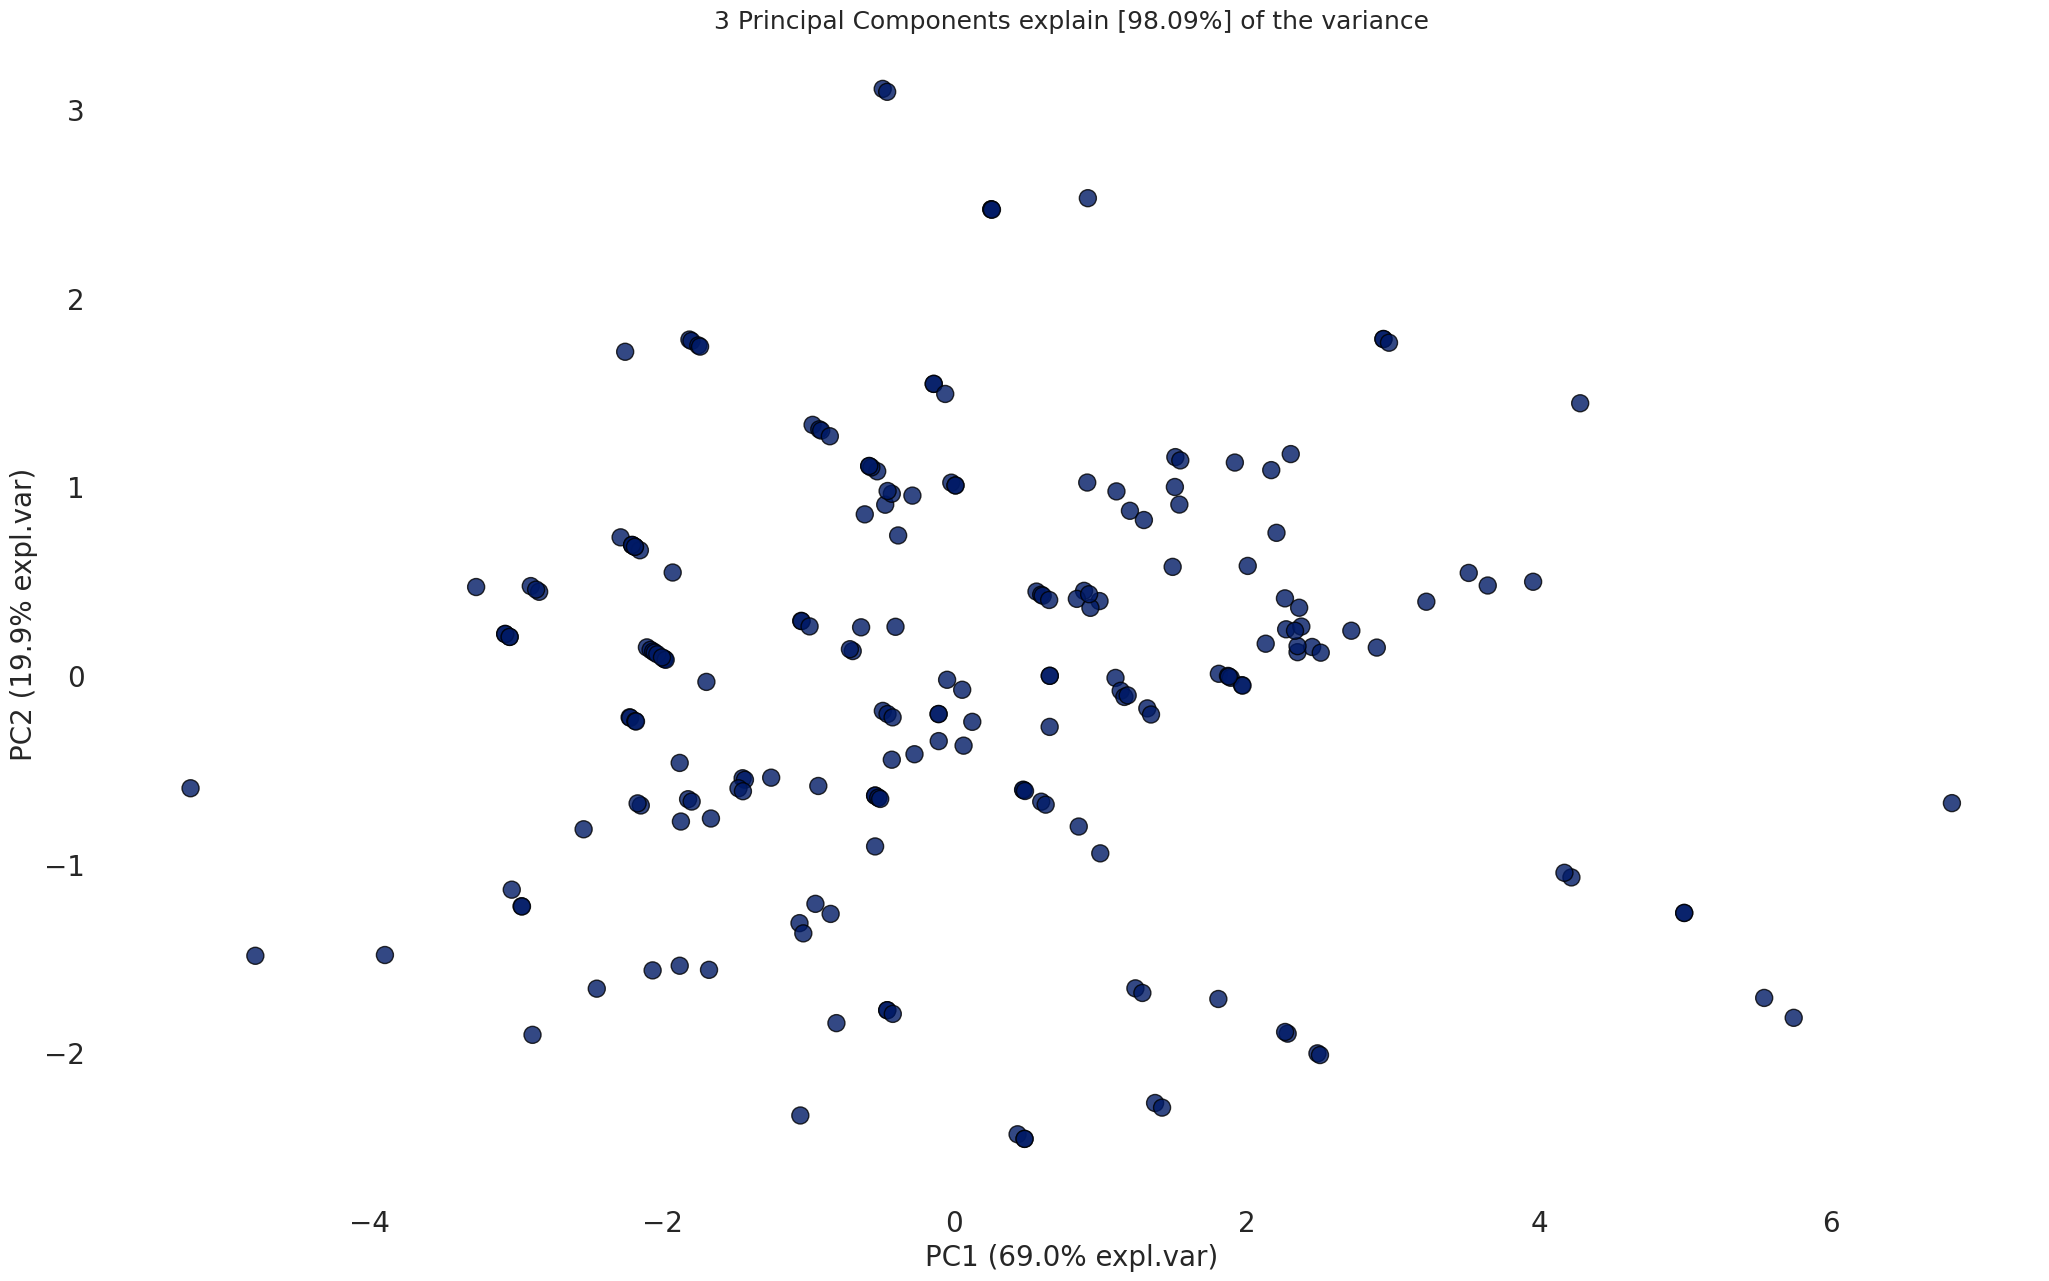

In [393]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [394]:
A = out['loadings'].T
A

,PC1,PC2,PC3
curbweight,0.450464,-0.230944,-0.000823
enginesize,0.431429,-0.241397,0.536941
horsepower,0.444936,0.160212,0.454892
peakrpm,-0.029010,0.892401,0.250695
citympg,-0.451966,-0.210676,0.448117
highwaympg,-0.455926,-0.148191,0.491029


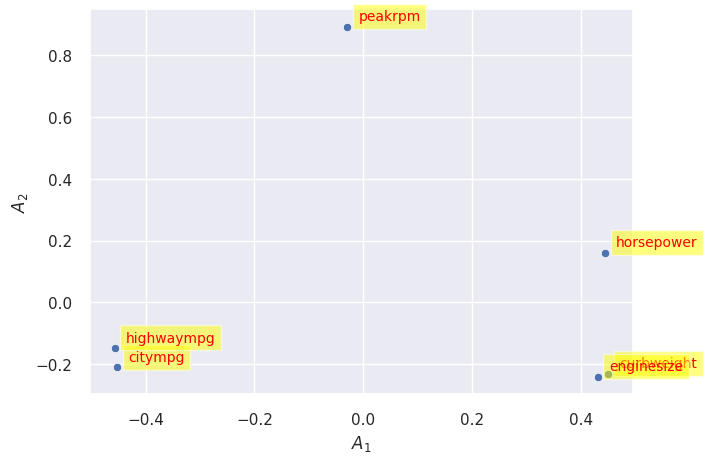

In [279]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

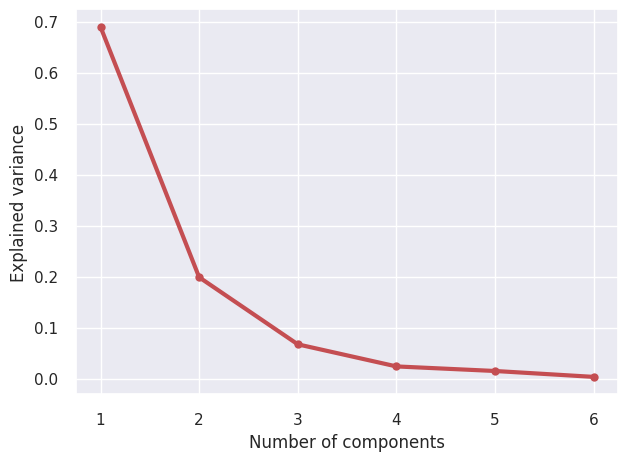

In [395]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

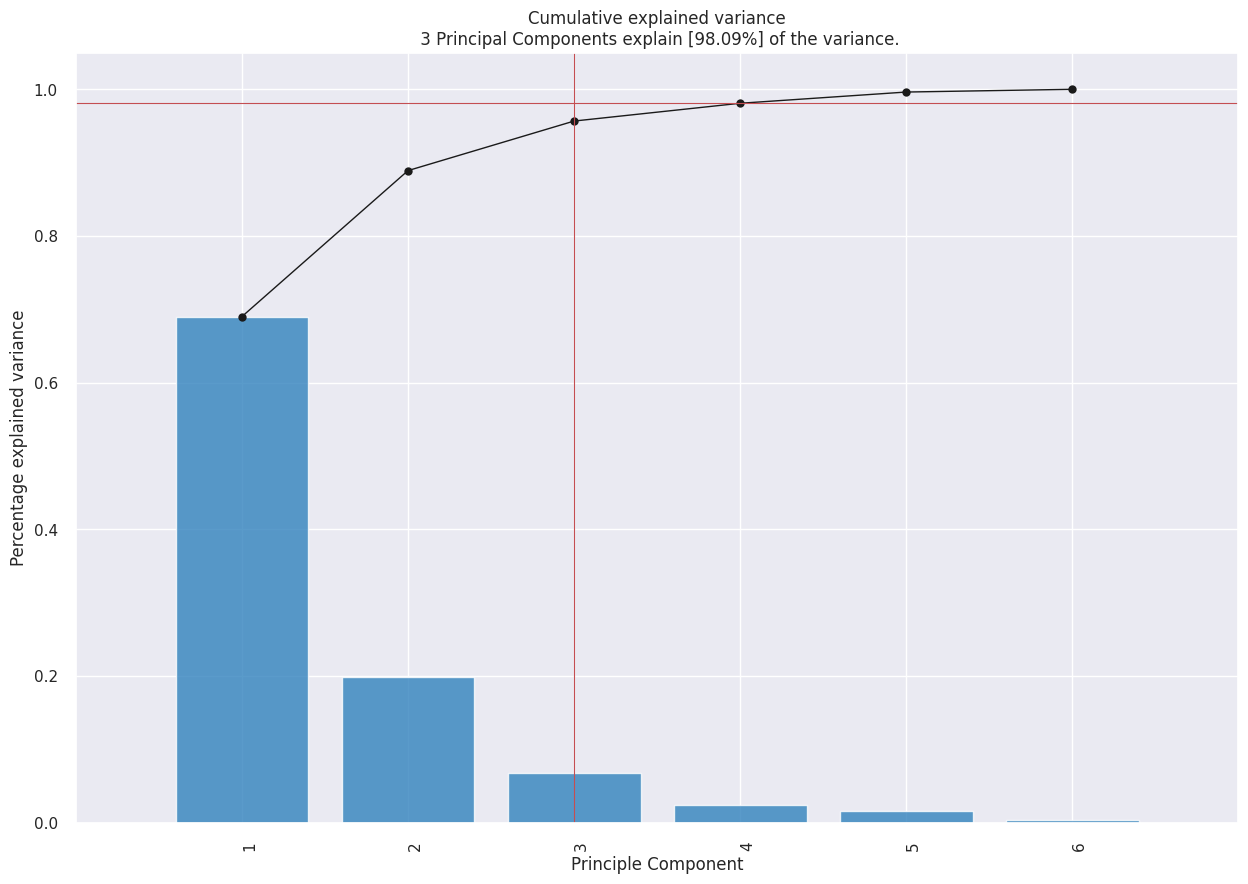

<Figure size 700x500 with 0 Axes>

In [396]:
model.plot();

**Biplot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


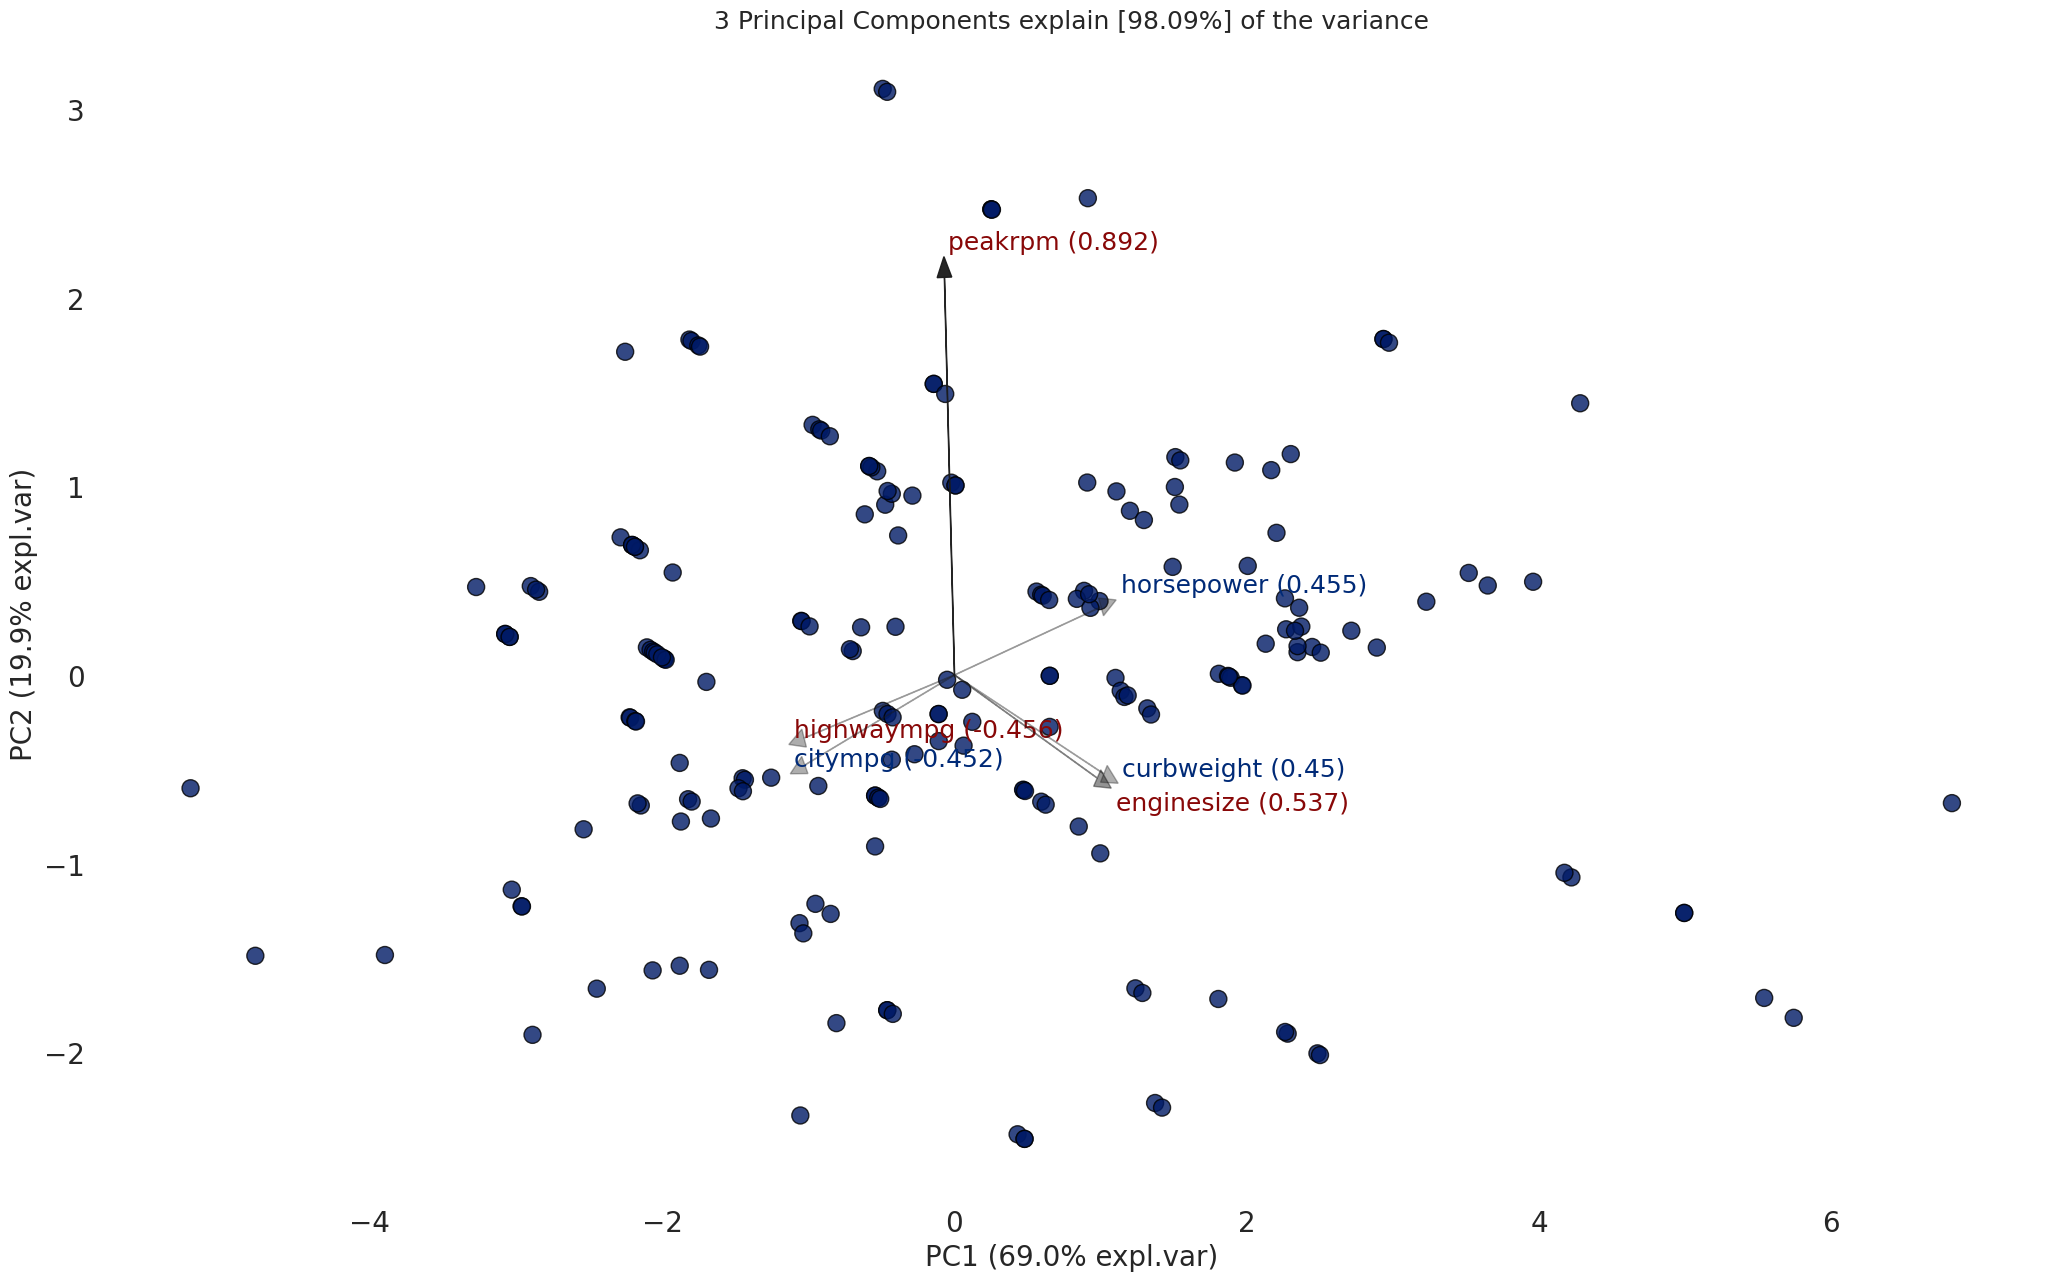

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [98.09%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (19.9% expl.var)'>)

In [397]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


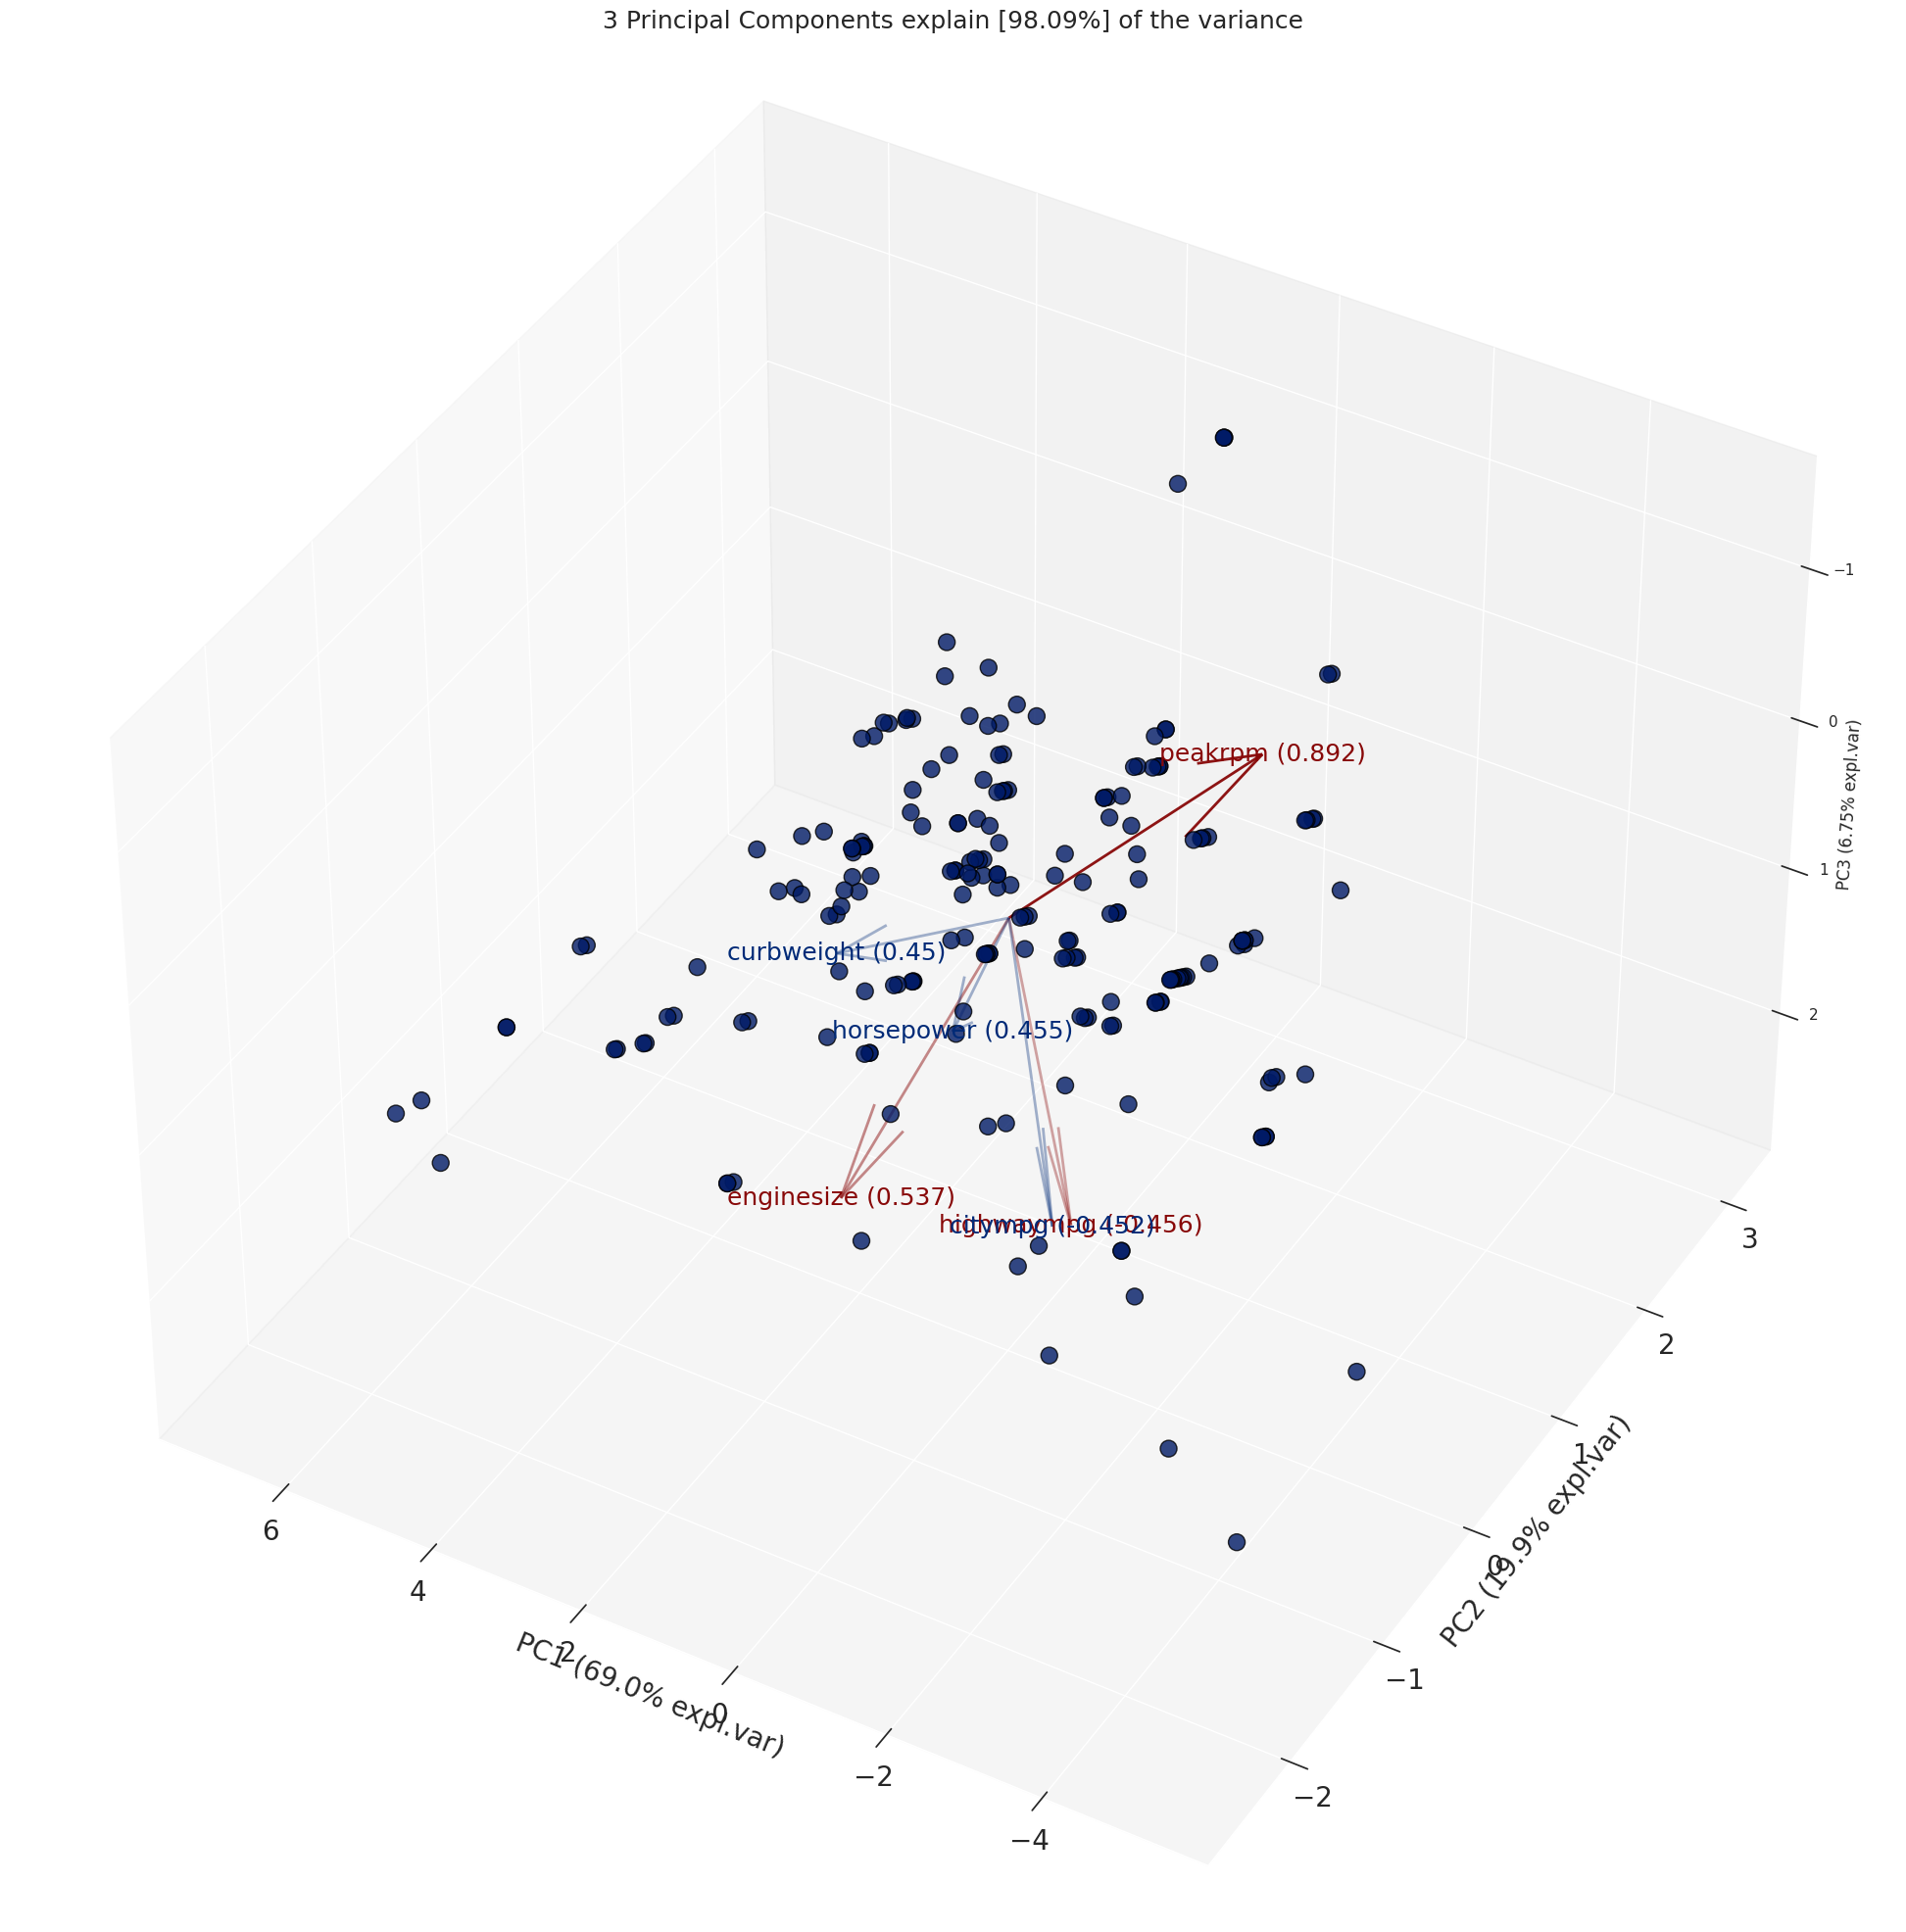

(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [98.09%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (19.9% expl.var)', zlabel='PC3 (6.75% expl.var)'>)

In [398]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. 
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [399]:
!pip3 install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [400]:

#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

In [401]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)

#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Esthersemenhyia/INSE-6220/main/CarPrice_Assignment.csv')
df.head(25)

,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,class
0,2548,130,111,5000,21,27,3
1,2548,130,111,5000,21,27,3
2,2823,152,154,5000,19,26,1
3,2337,109,102,5500,24,30,2
4,2824,136,115,5500,18,22,2
5,2507,136,110,5500,19,25,2
6,2844,136,110,5500,19,25,1
7,2954,136,110,5500,19,25,1
8,3086,131,140,5500,17,20,1
9,3053,131,160,5500,16,22,0


In [402]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (184, 7)
Unseen Data For Predictions: (21, 7)


In [403]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"-2: 0, -1: 1, 0: 2, 1: 3, 2: 4, 3: 5"
4,Original data shape,"(184, 7)"
5,Transformed data shape,"(184, 7)"
6,Transformed train set shape,"(128, 7)"
7,Transformed test set shape,"(56, 7)"
8,Numeric features,6
9,Preprocess,True


**Comparing All Models**

In [404]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6103,0.0000,0.6103,0.5748,0.5775,0.4831,0.4968,0.2610
xgboost,Extreme Gradient Boosting,0.5955,0.0000,0.5955,0.5481,0.5543,0.4637,0.4811,0.1450
rf,Random Forest Classifier,0.5949,0.0000,0.5949,0.5451,0.5491,0.4520,0.4729,0.3200
gbc,Gradient Boosting Classifier,0.5718,0.0000,0.5718,0.5544,0.5454,0.4314,0.4454,0.7340
lightgbm,Light Gradient Boosting Machine,0.5641,0.0000,0.5641,0.5553,0.5394,0.4272,0.4421,0.2630
dt,Decision Tree Classifier,0.5468,0.0000,0.5468,0.5344,0.5152,0.4078,0.4243,0.1600
ridge,Ridge Classifier,0.4782,0.0000,0.4782,0.3673,0.4015,0.2702,0.2895,0.1800
lr,Logistic Regression,0.4615,0.0000,0.4615,0.3563,0.3884,0.2592,0.2807,0.6530
knn,K Neighbors Classifier,0.4532,0.0000,0.4532,0.4276,0.4172,0.2759,0.2897,0.3470
lda,Linear Discriminant Analysis,0.4474,0.0000,0.4474,0.3747,0.3969,0.2456,0.2587,0.2080


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [405]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

 Create a Model

**Logistic Regresssion**

In [408]:
# Tune hyperparameters with scikit-learn (default)

**Tune the model**

In [409]:
tuned_lr=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4615,0.0000,0.4615,0.3718,0.4015,0.2018,0.2148
1,0.4615,0.0000,0.4615,0.3538,0.3978,0.2222,0.2308
2,0.6154,0.0000,0.6154,0.4744,0.5329,0.4298,0.4528
3,0.4615,0.0000,0.4615,0.3626,0.3986,0.2479,0.2652
4,0.4615,0.0000,0.4615,0.3462,0.3846,0.2661,0.2995
5,0.4615,0.0000,0.4615,0.3308,0.3736,0.3053,0.3290
6,0.2308,0.0000,0.2308,0.1487,0.1752,0.0076,0.0085
7,0.4615,0.0000,0.4615,0.3000,0.3590,0.2891,0.3105
8,0.5833,0.0000,0.5833,0.4917,0.5000,0.4231,0.4633


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [410]:
tuned_lr

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create model with K-nearest neighbour**

In [411]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3846,0.0000,0.3846,0.3462,0.3393,0.1111,0.1201
1,0.5385,0.0000,0.5385,0.4615,0.4872,0.3710,0.3802
2,0.3846,0.0000,0.3846,0.4487,0.4083,0.1875,0.1906
3,0.6923,0.0000,0.6923,0.6667,0.6564,0.5806,0.5960
4,0.3846,0.0000,0.3846,0.5256,0.3923,0.2000,0.2120
5,0.6154,0.0000,0.6154,0.5641,0.5692,0.4961,0.5172
6,0.4615,0.0000,0.4615,0.3590,0.3846,0.3106,0.3434
7,0.1538,0.0000,0.1538,0.1603,0.1538,-0.0672,-0.0682
8,0.4167,0.0000,0.4167,0.2778,0.3175,0.2364,0.2557


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model with K-nearest neighbour**

In [412]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5385,0.0000,0.5385,0.5214,0.4799,0.3097,0.3499
1,0.4615,0.0000,0.4615,0.4231,0.4359,0.2602,0.2623
2,0.7692,0.0000,0.7692,0.7949,0.7637,0.6880,0.7049
3,0.7692,0.0000,0.7692,0.7846,0.7607,0.6905,0.6962
4,0.4615,0.0000,0.4615,0.5590,0.4855,0.3053,0.3102
5,0.7692,0.0000,0.7692,0.8462,0.7817,0.7111,0.7273
6,0.3846,0.0000,0.3846,0.3000,0.3333,0.2000,0.2083
7,0.2308,0.0000,0.2308,0.2628,0.2418,0.0370,0.0376
8,0.5000,0.0000,0.5000,0.4139,0.4335,0.3514,0.3646


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [413]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

**Tune QDA Model**

In [414]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Classification + PCA**

In [415]:
!pip install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [416]:
clf_pca = setup(data=data, target='class', train_size=0.6, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"-2: 0, -1: 1, 0: 2, 1: 3, 2: 4, 3: 5"
4,Original data shape,"(184, 7)"
5,Transformed data shape,"(184, 4)"
6,Transformed train set shape,"(110, 4)"
7,Transformed test set shape,"(74, 4)"
8,Numeric features,6
9,Preprocess,True


# **Comparing Models**

In [417]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.5182,0.0000,0.5182,0.4668,0.4714,0.3665,0.3842,0.2850
et,Extra Trees Classifier,0.4909,0.0000,0.4909,0.4539,0.4541,0.3199,0.3366,0.2780
rf,Random Forest Classifier,0.4818,0.0000,0.4818,0.4627,0.4508,0.3147,0.3242,0.2860
gbc,Gradient Boosting Classifier,0.4727,0.0000,0.4727,0.4753,0.4447,0.3071,0.3204,0.5520
lightgbm,Light Gradient Boosting Machine,0.4727,0.0000,0.4727,0.4402,0.4358,0.3018,0.3142,0.3880
nb,Naive Bayes,0.4455,0.0000,0.4455,0.3726,0.3826,0.2501,0.2724,0.3460
lr,Logistic Regression,0.4273,0.0000,0.4273,0.3235,0.3475,0.2033,0.2282,0.2550
ridge,Ridge Classifier,0.4273,0.0000,0.4273,0.3013,0.3356,0.1902,0.2214,0.1340
dt,Decision Tree Classifier,0.4182,0.0000,0.4182,0.4262,0.3978,0.2435,0.2550,0.2400
lda,Linear Discriminant Analysis,0.4182,0.0000,0.4182,0.3178,0.3433,0.1987,0.2187,0.1520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **Best model with PCA**

In [418]:
best_model_pca

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

# **Tune Best Model**

In [419]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5455,0.0000,0.5455,0.5455,0.5273,0.3678,0.3819
1,0.1818,0.0000,0.1818,0.1758,0.1721,-0.1124,-0.1164
2,0.3636,0.0000,0.3636,0.3485,0.3364,0.1809,0.1910
3,0.6364,0.0000,0.6364,0.5682,0.5974,0.5000,0.5060
4,0.6364,0.0000,0.6364,0.6061,0.5485,0.5111,0.5501
5,0.3636,0.0000,0.3636,0.2000,0.2565,0.1630,0.1890
6,0.6364,0.0000,0.6364,0.7424,0.6169,0.5368,0.5667
7,0.5455,0.0000,0.5455,0.3864,0.4502,0.4086,0.4276
8,0.5455,0.0000,0.5455,0.5909,0.5498,0.4086,0.4131


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [420]:
!pip install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [421]:
!pip3 install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [422]:
#import the SHAP (SHapley Additive exPlanations) library
import shap

In [423]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3636,0.0000,0.3636,0.3182,0.3273,0.1149,0.1194
1,0.2727,0.0000,0.2727,0.2061,0.2175,0.0330,0.0358
2,0.2727,0.0000,0.2727,0.1758,0.2071,0.0538,0.0582
3,0.6364,0.0000,0.6364,0.5682,0.5974,0.5000,0.5060
4,0.6364,0.0000,0.6364,0.5818,0.6061,0.5056,0.5119
5,0.4545,0.0000,0.4545,0.4318,0.4156,0.2826,0.2990
6,0.6364,0.0000,0.6364,0.7727,0.6411,0.5464,0.5702
7,0.4545,0.0000,0.4545,0.3000,0.3604,0.2747,0.2920
8,0.5455,0.0000,0.5455,0.5909,0.5498,0.4086,0.4131


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [424]:
tuned_rf_pca = tune_model(rf_pca)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4545,0.0000,0.4545,0.5909,0.4697,0.3125,0.3262
1,0.2727,0.0000,0.2727,0.2348,0.2424,0.0435,0.0444
2,0.2727,0.0000,0.2727,0.2879,0.2584,0.0833,0.0870
3,0.7273,0.0000,0.7273,0.7045,0.6883,0.6292,0.6441
4,0.6364,0.0000,0.6364,0.5818,0.5818,0.5165,0.5346
5,0.3636,0.0000,0.3636,0.1970,0.2468,0.1979,0.2429
6,0.6364,0.0000,0.6364,0.7879,0.6472,0.5417,0.5715
7,0.5455,0.0000,0.5455,0.3909,0.4470,0.4086,0.4328
8,0.5455,0.0000,0.5455,0.5909,0.5498,0.4086,0.4131


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# **Evaluate Best Model**

In [425]:
!pip install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


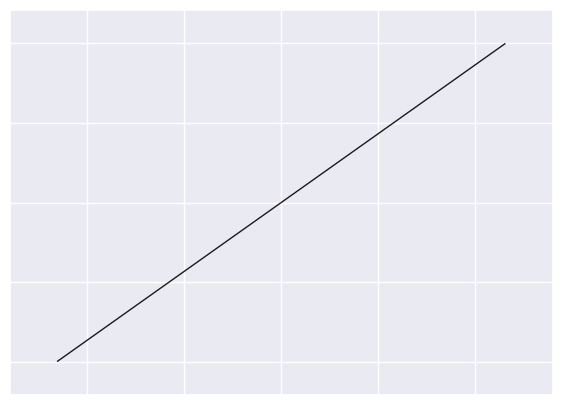

In [426]:
import networkx as nx

# create a networkx graph
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)

# define the node positions for drawing
pos = nx.spring_layout(G)

# draw the network edges
nx.draw_networkx_edges(G, pos)

# show the plot
import matplotlib.pyplot as plt
plt.show()


In [427]:
lr_pca = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4545,0.0000,0.4545,0.4848,0.4000,0.2584,0.2818
1,0.1818,0.0000,0.1818,0.1152,0.1409,-0.2073,-0.2313
2,0.4545,0.0000,0.4545,0.3182,0.3515,0.1951,0.2339
3,0.6364,0.0000,0.6364,0.5000,0.5455,0.4884,0.5369
4,0.4545,0.0000,0.4545,0.4091,0.4242,0.2826,0.2890
5,0.2727,0.0000,0.2727,0.1169,0.1636,0.0222,0.0268
6,0.2727,0.0000,0.2727,0.2121,0.2364,-0.0476,-0.0497
7,0.4545,0.0000,0.4545,0.2532,0.3195,0.2500,0.3032
8,0.5455,0.0000,0.5455,0.3909,0.4513,0.3889,0.4141


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [428]:
tuned_lr_pca = tune_model(lr_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3636,0.0000,0.3636,0.2727,0.2909,0.0610,0.0731
1,0.1818,0.0000,0.1818,0.1182,0.1414,-0.1928,-0.2177
2,0.4545,0.0000,0.4545,0.2980,0.3329,0.1646,0.2284
3,0.7273,0.0000,0.7273,0.5455,0.6187,0.6118,0.6551
4,0.5455,0.0000,0.5455,0.3442,0.4203,0.3210,0.3622
5,0.2727,0.0000,0.2727,0.1169,0.1636,0.0000,0.0000
6,0.3636,0.0000,0.3636,0.2468,0.2893,0.0610,0.0669
7,0.4545,0.0000,0.4545,0.2532,0.3195,0.2500,0.3032
8,0.5455,0.0000,0.5455,0.3000,0.3864,0.3750,0.4394


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# **Evaluate Model**

In [429]:
tuned_lr_pca

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

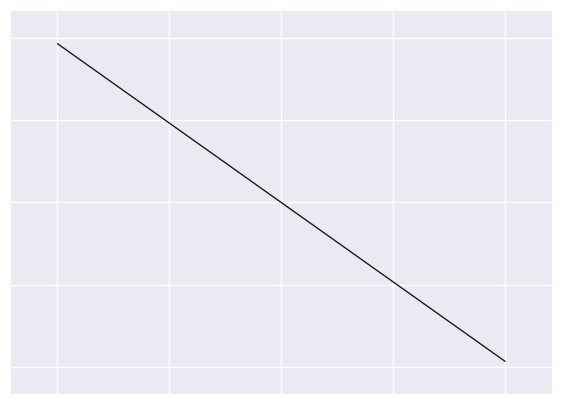

In [431]:
import networkx as nx

# create a networkx graph
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)

# define the node positions for drawing
pos = nx.spring_layout(G)

# draw the network edges
nx.draw_networkx_edges(G, pos)

# show the plot
import matplotlib.pyplot as plt
plt.show()



# **Create K-nearest neighbour Model**

In [432]:
knn_pca = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3636,0.0000,0.3636,0.2500,0.2961,0.0833,0.0895
1,0.2727,0.0000,0.2727,0.2818,0.2500,0.0538,0.0568
2,0.5455,0.0000,0.5455,0.4697,0.4909,0.3678,0.3819
3,0.5455,0.0000,0.5455,0.4697,0.4909,0.3605,0.3748
4,0.5455,0.0000,0.5455,0.4909,0.5152,0.3820,0.3868
5,0.3636,0.0000,0.3636,0.1775,0.2364,0.1720,0.2142
6,0.2727,0.0000,0.2727,0.2500,0.2597,0.0112,0.0114
7,0.3636,0.0000,0.3636,0.2909,0.3182,0.1720,0.1822
8,0.3636,0.0000,0.3636,0.3182,0.3333,0.1630,0.1823


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [433]:
tuned_knn_pca = tune_model(knn_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3636,0.0000,0.3636,0.3182,0.3273,0.1149,0.1209
1,0.3636,0.0000,0.3636,0.3182,0.3333,0.1538,0.1556
2,0.5455,0.0000,0.5455,0.3896,0.4342,0.3529,0.3953
3,0.7273,0.0000,0.7273,0.5864,0.6479,0.6118,0.6287
4,0.5455,0.0000,0.5455,0.4364,0.4773,0.3750,0.3896
5,0.4545,0.0000,0.4545,0.4318,0.4156,0.2826,0.2990
6,0.6364,0.0000,0.6364,0.5909,0.5939,0.5111,0.5291
7,0.5455,0.0000,0.5455,0.4318,0.4805,0.3956,0.4051
8,0.6364,0.0000,0.6364,0.6136,0.6017,0.5165,0.5289


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [441]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

# **Evaluate Model KNN**

In [449]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# define your data and target variables
X_full_data = ...
y_full_data = ...

# define the parameter grid for k-NN
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# create a k-NN classifier
knn = KNeighborsClassifier()

# perform grid search on the full dataset
knn_full_data = GridSearchCV(knn, param_grid, cv=5)
knn_full_data.fit(X_full_data, y_full_data)
k_full_data = knn_full_data.best_params_

# define your data and target variables for dataset Z
X_Z = ...
y_Z = ...

# create a k-NN classifier
knn_Z = KNeighborsClassifier()

# perform grid search on dataset Z
knn_Z = GridSearchCV(knn_Z, param_grid, cv=5)
knn_Z.fit(X_Z, y_Z)
best_k_Z = knn_Z.best_params_['n_neighbors']

# create a k-NN classifier with the best k value found in dataset Z
knn_Z = KNeighborsClassifier(n_neighbors=best_k_Z)
knn_Z.fit(X_Z, y_Z)

# define your data and target variables for dataset X
X_X = ...
y_X = ...

# use the classifier to make predictions on dataset X
y_zx = knn_Z.predict(X_X)

# create a k-NN classifier with the best k value found in dataset full_data
knn_full_data = KNeighborsClassifier(n_neighbors=k_full_data['n_neighbors'])

# cross-validate the classifiers on all datasets
scoring = ['fit_time', 'test_f1_macro']
scores_knn_full_data = cross_validate(knn_full_data, X_full_data, y_full_data, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, X_Z, y_Z, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, X_Z12, y_Z12, cv=5, scoring=scoring)

# create a dictionary to hold the scores
knn_scores_dict = {}
for i in ['fit_time', 'test_f1_macro']:
    knn_scores_dict["knn_full_data " + i] = scores_knn_full_data[i].mean()
    knn_scores_dict["knn_Z " + i] = scores_knn_Z[i].mean()
    knn_scores_dict




TypeError: ignored

# **Create Quadratic Discriminant Analysis Model**

In [450]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the QDA and PCA pipeline with regularization
qda_pca = Pipeline([
    ('pca', PCA()),
    ('qda', QuadraticDiscriminantAnalysis(reg_param=0.1))
])

# Define the parameter grid to search over
param_grid = {
    'pca__n_components': [2, 4, 6],
    'qda__reg_param': [0.1, 0.5, 1.0]
}

# Tune the QDA-PCA model using the parameter grid
tuned_qda_pca = GridSearchCV(qda_pca, param_grid, cv=5)


In [337]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the QDA and PCA pipeline
qda_pca = Pipeline([
    ('pca', PCA()),
    ('qda', QuadraticDiscriminantAnalysis())
])

# Define the parameter grid to search over
param_grid = {
    'pca__n_components': [2, 4, 6],
    'qda__reg_param': [0.1, 0.5, 1.0]
}

# Tune the QDA-PCA model using the parameter grid
tuned_qda_pca = GridSearchCV(qda_pca, param_grid, cv=5)


# **Evaluate Model**

In [451]:
tuned_qda_pca

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None, n_oversamples=10,
                                            power_iteration_normalizer='auto',
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('qda',
                                        QuadraticDiscriminantAnalysis(priors=None,
                                                                      reg_param=0.1,
                                                                      store_covariance=False,
                                                                      tol=0.0001))],
                                verbose=False),
             n_jobs=None,
             param_grid={'pca__n_components': [2, 4, 6],
                         'qda__reg_param': [0.1, 0.5, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

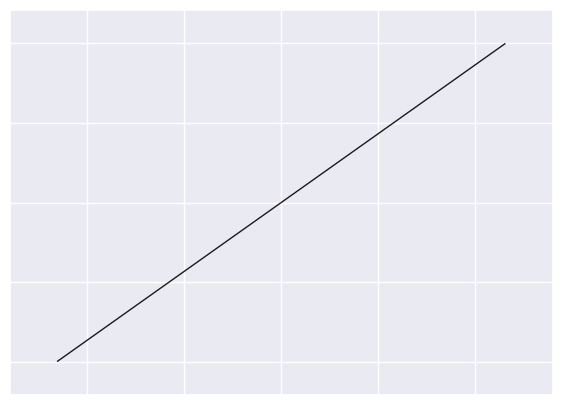

In [452]:

import networkx as nx

# create a networkx graph
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)

# define the node positions for drawing
pos = nx.spring_layout(G)

# draw the network edges
nx.draw_networkx_edges(G, pos)

# show the plot
import matplotlib.pyplot as plt
plt.show()

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [453]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3636,0.0000,0.3636,0.3182,0.3273,0.1149,0.1194
1,0.2727,0.0000,0.2727,0.2424,0.2403,0.0538,0.0556
2,0.4545,0.0000,0.4545,0.2071,0.2844,0.2048,0.2987
3,0.7273,0.0000,0.7273,0.5864,0.6479,0.6118,0.6287
4,0.5455,0.0000,0.5455,0.4909,0.5030,0.3956,0.4047
5,0.4545,0.0000,0.4545,0.4394,0.4364,0.2667,0.2728
6,0.6364,0.0000,0.6364,0.6818,0.6442,0.5368,0.5487
7,0.4545,0.0000,0.4545,0.3455,0.3864,0.2826,0.2926
8,0.4545,0.0000,0.4545,0.5455,0.4848,0.3053,0.3085


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [454]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5455,0.0000,0.5455,0.6364,0.5303,0.4271,0.4458
1,0.2727,0.0000,0.2727,0.2576,0.2554,0.0538,0.0544
2,0.3636,0.0000,0.3636,0.3939,0.3485,0.2062,0.2174
3,0.5455,0.0000,0.5455,0.4879,0.5051,0.3750,0.3841
4,0.6364,0.0000,0.6364,0.6515,0.5788,0.5111,0.5430
5,0.4545,0.0000,0.4545,0.2364,0.3084,0.3053,0.3654
6,0.6364,0.0000,0.6364,0.7879,0.6472,0.5417,0.5715
7,0.6364,0.0000,0.6364,0.5227,0.5671,0.5319,0.5497
8,0.5455,0.0000,0.5455,0.6212,0.5485,0.4330,0.4468


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [455]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_samples_leaf=4, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

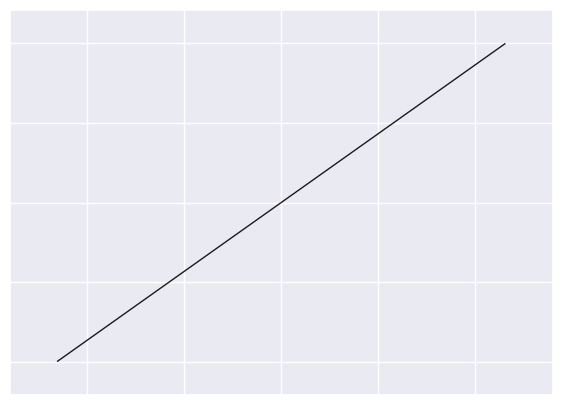

In [456]:
import networkx as nx

# create a networkx graph
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)

# define the node positions for drawing
pos = nx.spring_layout(G)

# draw the network edges
nx.draw_networkx_edges(G, pos)

# show the plot
import matplotlib.pyplot as plt
plt.show()

In [457]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [469]:
!pip install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [478]:
import shap

In [479]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

# Define X_train and assign it a value
X_train = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
X_train = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')
  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

NameError: ignored

In [466]:
interpret_model(tuned_et_pca, plot='summary')


ModuleNotFoundError: ignored

In [467]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

ModuleNotFoundError: ignored

In [468]:
interpret_model(tuned_et_pca, plot='reason')

ModuleNotFoundError: ignored